<a href="https://colab.research.google.com/github/ilfiahlailiyah11-cyber/Capstone-Project_Ilfiah-Nur-Lailiyah/blob/main/Capstone_Project_Ilfiah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

# ganti nama file sesuai yang diupload
df = pd.read_excel("DATA.xlsx")
df.head()

,Tahun,Provinsi,Fem_Rep,Gov_vice
0,2014,ACEH,14.81,0
1,2015,ACEH,14.81,0
2,2016,ACEH,16.00,0
3,2017,ACEH,14.81,0
4,2018,ACEH,14.81,0


In [11]:
# Rename kolom
df = df.rename(columns={
    "Fem_Rep": "Persentase_Perempuan_di_Parlemen",
    "Gov_vice": "Kepala_Daerah_Perempuan"
})

In [18]:
# Buat 2 kategori: ≥30% & <30%
df["Kategori30"] = df["Persentase_Perempuan_di_Parlemen"].apply(
    lambda x: "Memenuhi ≥30%" if x >= 30 else "Belum Memenuhi 30%"
)

Top 3 (total): ['SULAWESI UTARA', 'KALIMANTAN TENGAH', 'GORONTALO']
Bottom 3 (total): ['SUMATERA BARAT', 'KEP. BANGKA BELITUNG', 'NUSA TENGGARA BARAT']


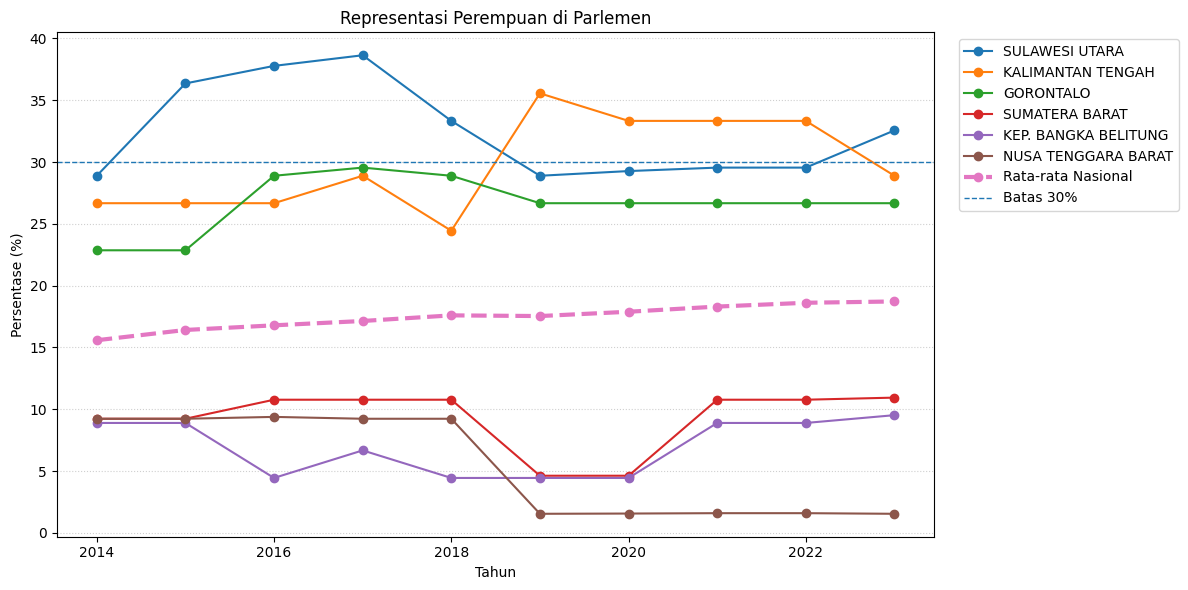

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# Pilih 3 provinsi tertinggi & 3 terendah berdasarkan JUMLAH (total)
#    -> agar provinsi yang sama muncul di semua tahun
# ============================
# Hitung total (sum) persentase per provinsi sepanjang periode
totals = df.groupby("Provinsi")["Persentase_Perempuan_di_Parlemen"].sum().sort_values(ascending=False)

top3 = totals.head(3).index.tolist()
bottom3 = totals.tail(3).index.tolist()
selected_provinces = top3 + bottom3

print("Top 3 (total):", top3)
print("Bottom 3 (total):", bottom3)

# ============================
# Siapkan data untuk plot line chart
# ============================
# Filter dataset hanya untuk provinsi terpilih
df_sel = df[df["Provinsi"].isin(selected_provinces)].copy()

# Pastikan Tahun terurut
years_sorted = sorted(df["Tahun"].unique())

# Hitung rata-rata nasional per tahun
avg_nasional = df.groupby("Tahun")["Persentase_Perempuan_di_Parlemen"].mean().reindex(years_sorted).reset_index()
avg_nasional = avg_nasional.rename(columns={"Persentase_Perempuan_di_Parlemen": "RataRata_Nasional"})

# ============================
# Plot: Grafik Garis 3 Provinsi Tertinggi + 3 Terendah + Rata-rata Nasional
# ============================
plt.figure(figsize=(12,6))

# Plot tiap provinsi
for prov in selected_provinces:
    series = df_sel[df_sel["Provinsi"] == prov].set_index("Tahun").reindex(years_sorted)["Persentase_Perempuan_di_Parlemen"]
    # Jika ada tahun yang hilang untuk provinsi, reindex menghasilkan NaN; plot tetap aman
    plt.plot(years_sorted, series.values, marker='o', label=prov)

# Plot rata-rata nasional (garis tebal)
plt.plot(avg_nasional["Tahun"], avg_nasional["RataRata_Nasional"], marker='o', linewidth=3, linestyle='--', label='Rata-rata Nasional')

plt.axhline(30, linestyle='--', linewidth=1, label='Batas 30%')
plt.title("Representasi Perempuan di Parlemen")
plt.xlabel("Tahun")
plt.ylabel("Persentase (%)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

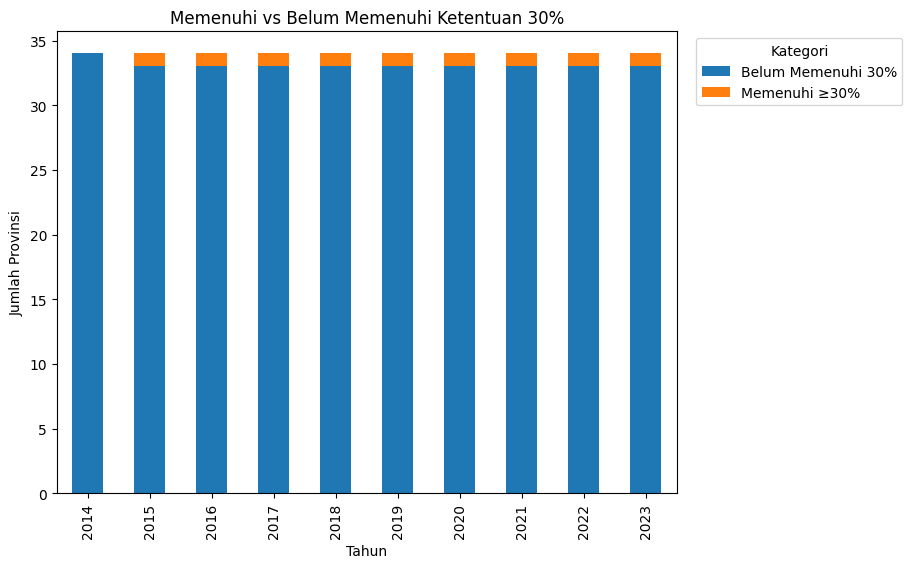

Daftar Provinsi yang Memenuhi Kuota 30% tiap Tahun:

Tahun 2015: SULAWESI UTARA
Tahun 2016: SULAWESI UTARA
Tahun 2017: SULAWESI UTARA
Tahun 2018: SULAWESI UTARA
Tahun 2019: KALIMANTAN TENGAH
Tahun 2020: KALIMANTAN TENGAH
Tahun 2021: KALIMANTAN TENGAH
Tahun 2022: KALIMANTAN TENGAH
Tahun 2023: SULAWESI UTARA


In [22]:
# Jumlah provinsi memenuhi 30% vs belum + daftar provinsi

# Tambahkan kolom kategori
df["Kategori30"] = df["Persentase_Perempuan_di_Parlemen"].apply(
    lambda x: "Memenuhi ≥30%" if x >= 30 else "Belum Memenuhi 30%"
)

# Hitung jumlah provinsi memenuhi / belum tiap tahun
prov_count = df.groupby(["Tahun", "Kategori30"])["Provinsi"].nunique().unstack().fillna(0)

# Plot grafik batang
prov_count.plot(kind="bar", stacked=True, figsize=(8,6))
plt.title("Memenuhi vs Belum Memenuhi Ketentuan 30%")
plt.ylabel("Jumlah Provinsi")
plt.xlabel("Tahun")
plt.legend(title="Kategori", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()

# Buat tabel daftar provinsi yang memenuhi tiap tahun
provinsi_memenuhi = (
    df[df["Persentase_Perempuan_di_Parlemen"] >= 30]
    .groupby("Tahun")["Provinsi"]
    .apply(list)
    .reset_index()
)

print("Daftar Provinsi yang Memenuhi Kuota 30% tiap Tahun:\n")
for _, row in provinsi_memenuhi.iterrows():
    print(f"Tahun {row['Tahun']}: {', '.join(row['Provinsi'])}")


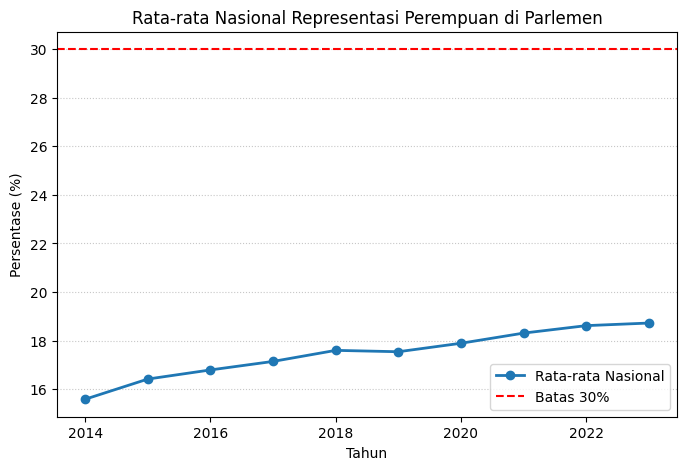

In [24]:
# Grafik garis: Rata-rata nasional
avg_dprd = df.groupby("Tahun")["Persentase_Perempuan_di_Parlemen"].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(avg_dprd["Tahun"], avg_dprd["Persentase_Perempuan_di_Parlemen"], marker="o", linewidth=2, label="Rata-rata Nasional")
plt.axhline(30, color="red", linestyle="--", label="Batas 30%")
plt.title("Rata-rata Nasional Representasi Perempuan di Parlemen")
plt.xlabel("Tahun")
plt.ylabel("Persentase (%)")
plt.legend()
plt.grid(axis="y", linestyle=":", alpha=0.7)
plt.show()


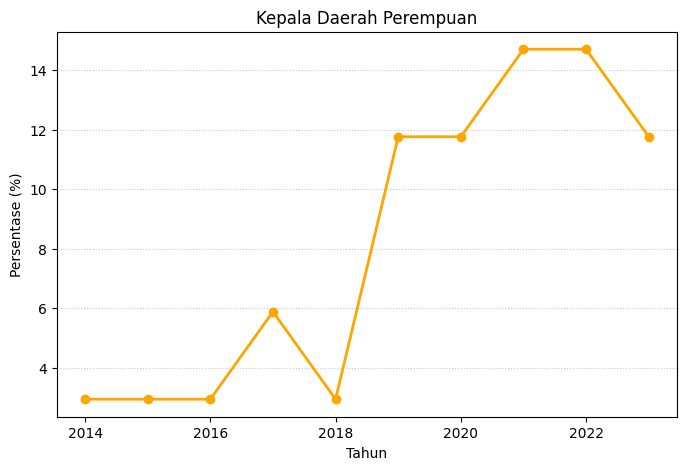

In [23]:
# Grafik garis: Kepala daerah perempuan
kdh_summary = df.groupby("Tahun")["Kepala_Daerah_Perempuan"].mean().reset_index()
kdh_summary["Persentase"] = kdh_summary["Kepala_Daerah_Perempuan"] * 100

plt.figure(figsize=(8,5))
plt.plot(kdh_summary["Tahun"], kdh_summary["Persentase"], marker="o", color="orange", linewidth=2)
plt.title("Kepala Daerah Perempuan")
plt.xlabel("Tahun")
plt.ylabel("Persentase (%)")
plt.grid(axis="y", linestyle=":", alpha=0.7)
plt.show()
